In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
data = pd.read_csv(r"C:\Users\Owner\OneDrive - University of Bradford\Dissertation\Data\research_dataset.csv")

#Convert all objects to float in the codon frequencies

data["UUU"] = pd.to_numeric(data["UUU"], errors = 'coerce')
data["UUC"] = pd.to_numeric(data["UUC"], errors = 'coerce')

data = data.replace(np.nan, 0, regex=True)

In [14]:
data = data.reset_index()

In [15]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8819 entries, 0 to 8818
Data columns (total 70 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        8819 non-null   int64  
 1   Kingdom      8819 non-null   object 
 2   DNAtype      8819 non-null   int64  
 3   SpeciesID    8819 non-null   int64  
 4   Ncodons      8819 non-null   int64  
 5   SpeciesName  8819 non-null   object 
 6   UUU          8819 non-null   float64
 7   UUC          8819 non-null   float64
 8   UUA          8819 non-null   float64
 9   UUG          8819 non-null   float64
 10  CUU          8819 non-null   float64
 11  CUC          8819 non-null   float64
 12  CUA          8819 non-null   float64
 13  CUG          8819 non-null   float64
 14  AUU          8819 non-null   float64
 15  AUC          8819 non-null   float64
 16  AUA          8819 non-null   float64
 17  AUG          8819 non-null   float64
 18  GUU          8819 non-null   float64
 19  GUC   

In [11]:
#data.isnull()

In [16]:
x =  np.array(data.iloc[:, 6:69])
y = np.array(data.iloc[:, 2])

y

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

## Train and Split

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes = (10, 10, 10), max_iter=1000)
model.fit(x_train, y_train.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [20]:
model.score(x_test, y_test)

0.9909297052154195

In [21]:
y_pred = model.predict(x_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) 

cm = confusion_matrix(y_test, y_pred)
cm

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1133
           1       1.00      0.98      0.99       464
           2       0.96      0.98      0.97       167

    accuracy                           0.99      1764
   macro avg       0.98      0.99      0.99      1764
weighted avg       0.99      0.99      0.99      1764

[[1128    2    3]
 [   5  456    3]
 [   3    0  164]]


array([[1128,    2,    3],
       [   5,  456,    3],
       [   3,    0,  164]], dtype=int64)

Text(69.0, 0.5, 'Truth')

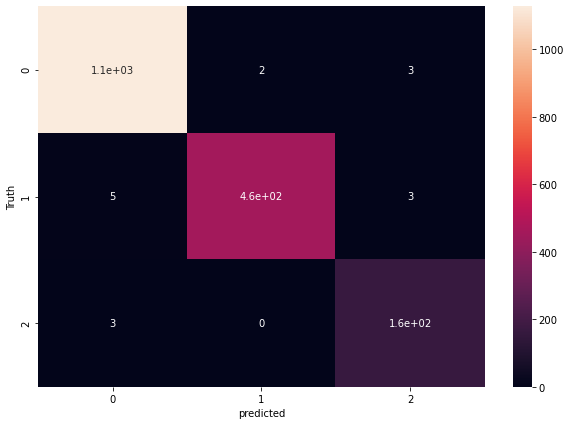

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

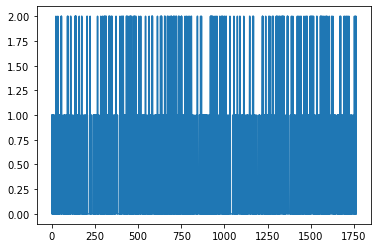

In [24]:
plt.plot(model.predict(x_test))